### TODO 基于Pan和一个材料的亚基因组比较，鉴定的同源基因保守情况

In [299]:
library(ggplot2)
library(dplyr)

In [300]:
plotData <- data.frame(
    geneType = c(
        "A2D5AtDt", "A2D5AtDt",
        "A2_At", "A2_At",
        "D5_Dt", "D5_Dt",
        "A2AtDt", "A2AtDt",
        "D5AtDt", "D5AtDt",
        "A2D5At", "A2D5At",
        "A2D5Dt", "A2D5Dt",
        "A2", "A2",
        "At", "At",
        "Dt", "Dt"
    ),
    geneCount = c(
        25914, 23004,
        6476, 2551,
        2155, 1898,
        1768, 1055,
        638, 894,
        384, 1074,
        350, 1093,
        21011, 8875,
        30913, 7212,
        17488, 5776
    ),
    syntelogType = c(
        "pan", "single",
        "pan", "single",
        "pan", "single",
        "pan", "single",
        "pan", "single",
        "pan", "single",
        "pan", "single",
        "pan", "single",
        "pan", "single",
        "pan", "single"
    )
)
plotData$geneType <- factor(
    plotData$geneType,
    levels = c(
        "A2D5AtDt", "A2_At", "D5_Dt", "A2AtDt",
        "D5AtDt", "A2D5At", "A2D5Dt","Dt","At","A2"
    )
)

png 
  2

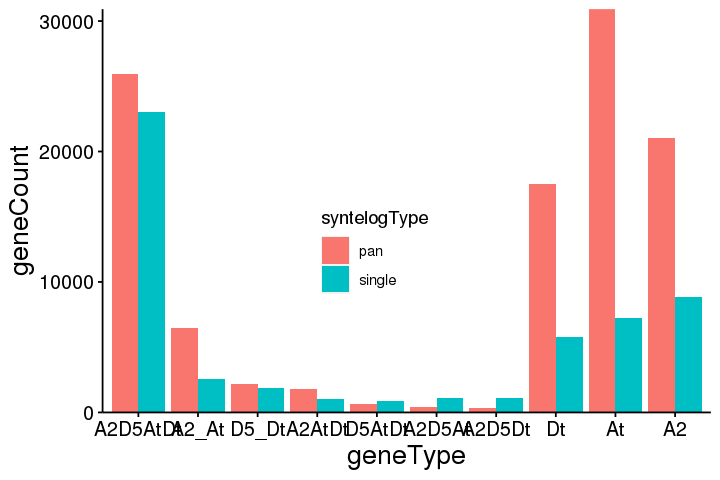

In [301]:
options(
    repr.plot.width = 6,
    repr.plot.height = 4
)
p=plotData %>% ggplot(
    aes(x = geneType, y = geneCount, fill = syntelogType)
) +
    geom_bar(
        stat = "identity", position = position_dodge()
    ) +
    base_theme +
    theme(
        legend.position = c(0.45, 0.4),
        panel.background = element_blank(),
        panel.grid = element_blank()
    ) +
    scale_y_continuous(
        expand = c(0,0)
    )
pdf("pan_vs_single_syntelog.pdf",width=6,height=4)
print(p)
dev.off()
p

### TODO 不同类型基因的占比

In [177]:
library(dplyr)
library(ggplot2)

In [226]:
plotData <- data.frame(
    geneType = c(
        "Core","Nearlycore",
        "At_fractionation",
        "Dt_fractionation","Other"
    ),
    geneNum = c(
       6830,9697,3950,2001,3436
    )
)
plotData$geneType=factor(plotData$geneType,levels = c(
    "Core","Nearlycore","At_fractionation",
    "Dt_fractionation","Other"))

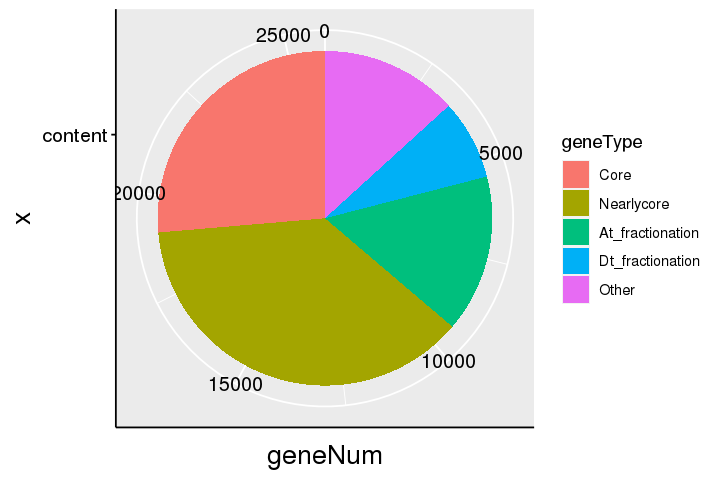

In [227]:
p <- plotData %>% ggplot(
    aes(x = "content", fill = geneType, y = geneNum)
) +
    geom_bar(
        stat = "identity", position = "stack"
    ) +
    coord_polar(theta = "y") +
    base_theme +
    theme()
#* 
pdf(
    "pan-gene_TypeCount.pdf",
)
print(p)
dev.off()
p

### TODO 棉花正在经历剧烈的去多倍化运动
+ At和Dt基因去多倍化的程度是否存在明显差异

In [1]:
library(ggplot2)
library(dplyr)
library(tidyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
All_panGene <- read.table(
    "./All_genome_pan_gene_V2.txt",
    header = T, sep = "\t"
)
# All_panGene=All_panGene %>% filter(
#     orthId!="None"
# )
#! 四个亚基因组中都至少一份材料中存在syntelog gene注释
All_panGene=All_panGene %>% filter(
    (AtGeneCount > 0)&(
        DtGeneCount > 0
    )&(
        A2GeneCount > 0
    )&(
        D5GeneCount > 0
    )
)

In [3]:
All_panGene %>% dim()

[1] 25914    91

In [9]:
All_panGene_filter %>% dim()

[1] 9387   91

In [5]:
#* 四个基因组水平非Core的基因在材料中存在的频率
All_panGene_filter <- All_panGene %>%
    filter(
        #! 非Core的Pan gene
        !((AtGeneCount >= 33) & (DtGeneCount >= 33) & (A2GeneCount >= 13) & (D5GeneCount == 1))
    ) %>%
    mutate(
        diploidRatio = (A2GeneCount + D5GeneCount) / 16,
        tetraploidRatio = (AtGeneCount + DtGeneCount) / 70,
        At_ratio = AtGeneCount / 35,
        Dt_ratio = DtGeneCount / 35,
        differencRatio = tetraploidRatio - diploidRatio
    )

In [203]:
head(All_panGene)

,AtGeneCount,DtGeneCount,A2GeneCount,D5GeneCount,orthId,J85_gene,DC001_gene,DC053_gene,DC086_gene,DC089_gene,⋯,ZY238_gene_Dt,ZY354_gene_Dt,ZY381_gene_Dt,ZY384_gene_Dt,ZY461_gene_Dt,diploidRatio,tetraploidRatio,At_ratio,Dt_ratio,differencRatio
,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,3,0,OG0000023,.,.,DC053_Chr01007480,.,DC089_Chr01007810,⋯,.,.,.,.,.,0.1875,0.00000000,0,0.00000000,-0.18750000
2,0,9,0,0,OG0000023,.,.,.,.,.,⋯,ZY238_D03006050,ZY354_D03006030,ZY381_D03006160,ZY384_D03006200,ZY461_D03005900,0.0000,0.12857143,0,0.25714286,0.12857143
3,0,6,0,0,OG0000023,.,.,.,.,.,⋯,.,.,.,.,.,0.0000,0.08571429,0,0.17142857,0.08571429
4,0,3,0,0,OG0000023,.,.,.,.,.,⋯,.,.,.,.,.,0.0000,0.04285714,0,0.08571429,0.04285714
5,0,7,0,0,OG0000023,.,.,.,.,.,⋯,.,.,.,.,.,0.0000,0.10000000,0,0.20000000,0.10000000
6,0,5,0,0,OG0000023,.,.,.,.,.,⋯,.,.,.,.,.,0.0000,0.07142857,0,0.14285714,0.07142857


png 
  2

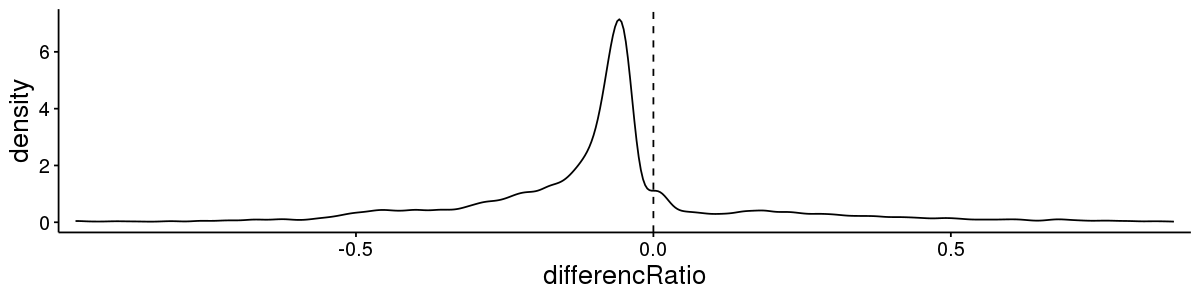

In [98]:
options(
    repr.plot.width = 10,
    repr.plot.height = 2.5
)
p <- All_panGene_filter %>% ggplot(
    aes(x = differencRatio)
) +
    geom_density() +
    geom_vline(
        xintercept = 0,
        linetype = "dashed"
    ) +
    base_theme +
    theme(
        panel.background = element_blank(),
        panel.grid = element_blank()
    )+
    scale_x_continuous(
        expand = c(0.01,0.01)
    )
pdf("panGene_frequence_diff.pdf",width=10,height = 2.5)
print(p)
dev.off()
p

In [6]:
#* 根据diploid和tetraploid的差异，分析fractionation在三个种中发生的频率
genePresenceRatio=All_panGene_filter %>% select(
    c(diploidRatio,tetraploidRatio,At_ratio,Dt_ratio,differencRatio)
)
genePresenceRatio$geneClass=as.vector(
            cut(
                genePresenceRatio$differencRatio,
                seq(-1, 1, 0.2),
                labels = c(
                    -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1
                ),
                right = F
            )
)
plotData=genePresenceRatio %>% pivot_longer(
    cols=c(diploidRatio,At_ratio,Dt_ratio),
    names_to='genome',
    values_to="geneRatio"
)
plotData$genome=factor(
    plotData$genome,levels = c('At_ratio','Dt_ratio','diploidRatio')
)
plotData$geneClass=factor(plotData$geneClass,levels = c('-0.8','-0.6','-0.4','-0.2','0','0.2','0.4','0.6','0.8','1'))

In [9]:
plotData %>% count(geneClass)

geneClass,n
<fct>,<int>
-0.8,165
-0.6,396
-0.4,1746
-0.2,3525
0,16887
0.2,2691
0.4,1533
0.6,741
0.8,402


png 
  2

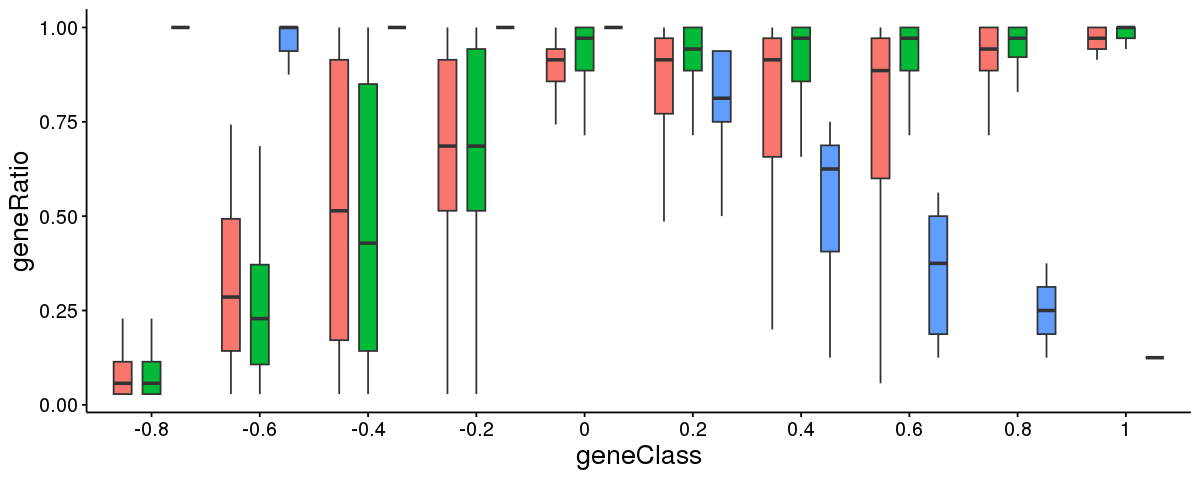

In [100]:
options(
    repr.plot.width = 10,
    repr.plot.height = 4
)
p=plotData %>% ggplot(
    aes(x = geneClass, y = geneRatio)
    ) +
    geom_boxplot(
        aes(fill = genome),
        outlier.colour = NA,
        width = 0.5,
        position = position_dodge(0.8)
    ) +
    theme_classic()+
    scale_x_discrete(
        limits=c('-0.8','-0.6','-0.4','-0.2','0','0.2','0.4','0.6','0.8','1')
    )+
    base_theme+
    theme(
        legend.position = "none"
    )
pdf("panGene_frequence.pdf",width=10,height = 4)
print(p)
dev.off()
p

In [102]:
a=All_panGene_filter %>% filter(
   ( differencRatio >= -0.2)&(
        differencRatio < 0
   )
)

In [103]:
wilcox.test(
    a$At_ratio,
    a$Dt_ratio,
    paired=T,
    correct =T
)


	Wilcoxon signed rank test with continuity correction

data:  a$At_ratio and a$Dt_ratio
V = 5261048, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [166]:
head(a)

,AtGeneCount,DtGeneCount,A2GeneCount,D5GEneCount,orthId,J85_gene,DC001_gene,DC053_gene,DC086_gene,DC089_gene,⋯,ZY238_gene_Dt,ZY354_gene_Dt,ZY381_gene_Dt,ZY384_gene_Dt,ZY461_gene_Dt,diploidRatio,tetraploidRatio,At_ratio,Dt_ratio,differencRatio
,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,32,35,15,1,OG0000253,J85_Chr02000300,DC001_Chr02000300,DC053_Chr02000280,DC086_Chr02000290,DC089_Chr02000350,⋯,ZY238_D01000270,ZY354_D01000270,ZY381_D01000270,ZY384_D01000270,ZY461_D01000270,1,0.9571429,0.9142857,1,-0.04285714
2,32,35,15,1,OG0000938,J85_Chr02000320,DC001_Chr02000320,DC053_Chr02000300,DC086_Chr02000310,DC089_Chr02000370,⋯,ZY238_D01000290,ZY354_D01000290,ZY381_D01000290,ZY384_D01000300,ZY461_D01000290,1,0.9571429,0.9142857,1,-0.04285714
3,32,35,15,1,OG0004654,J85_Chr02000260,DC001_Chr02000260,DC053_Chr02000240,DC086_Chr02000250,DC089_Chr02000310,⋯,ZY238_D01000230,ZY354_D01000230,ZY381_D01000230,ZY384_D01000230,ZY461_D01000230,1,0.9571429,0.9142857,1,-0.04285714
4,32,35,15,1,OG0012682,J85_Chr02000360,DC001_Chr02000360,DC053_Chr02000340,DC086_Chr02000350,DC089_Chr02000410,⋯,ZY238_D01000330,ZY354_D01000330,ZY381_D01000330,ZY384_D01000340,ZY461_D01000330,1,0.9571429,0.9142857,1,-0.04285714
5,32,35,15,1,OG0012683,J85_Chr02000340,DC001_Chr02000340,DC053_Chr02000320,DC086_Chr02000330,DC089_Chr02000390,⋯,ZY238_D01000310,ZY354_D01000310,ZY381_D01000310,ZY384_D01000320,ZY461_D01000310,1,0.9571429,0.9142857,1,-0.04285714
6,32,35,15,1,OG0012684,J85_Chr02000330,DC001_Chr02000330,DC053_Chr02000310,DC086_Chr02000320,DC089_Chr02000380,⋯,ZY238_D01000300,ZY354_D01000300,ZY381_D01000300,ZY384_D01000310,ZY461_D01000300,1,0.9571429,0.9142857,1,-0.04285714


In [39]:
All_panGene %>%
    filter(
        (differencRatio > -0.6) & (differencRatio < -0.4)
    ) %>%
    head()

,AtGeneCount,DtGeneCount,A2GeneCount,D5GEneCount,orthId,J85_gene,DC001_gene,DC053_gene,DC086_gene,DC089_gene,⋯,ZY238_gene_Dt,ZY354_gene_Dt,ZY381_gene_Dt,ZY384_gene_Dt,ZY461_gene_Dt,diploidRatio,tetraploidRatio,At_ratio,Dt_ratio,differencRatio
,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,16,9,12,1,OG0000360,J85_Chr01027740,DC001_Chr01027740,DC053_Chr01027990,DC086_Chr01022890,DC089_Chr01027940,⋯,.,.,.,.,.,0.8125,0.3571429,0.4571429,0.25714286,-0.4553571
2,28,1,14,1,OG0028131,J85_Chr01029690,DC001_Chr01029690,DC053_Chr01030150,.,DC089_Chr01029960,⋯,.,ZY354_D01024110,.,.,.,0.9375,0.4142857,0.8000000,0.02857143,-0.5232143
3,34,5,15,1,OG0026609,J85_Chr01028150,DC001_Chr01028150,DC053_Chr01028420,DC086_Chr01023290,DC089_Chr01028370,⋯,.,.,ZY381_D01022850,ZY384_D01022480,.,1.0000,0.5571429,0.9714286,0.14285714,-0.4428571
4,20,1,12,0,OG0029793,J85_Chr01026050,DC001_Chr01026050,DC053_Chr01026220,.,DC089_Chr01026220,⋯,.,.,.,.,.,0.7500,0.3000000,0.5714286,0.02857143,-0.4500000
5,14,7,12,1,OG0000805,J85_Chr01024600-J85_Chr01024610,DC001_Chr01024600-DC001_Chr01024610,DC053_Chr01024780-DC053_Chr01024790,DC086_Chr01020150-DC086_Chr01020160,.,⋯,.,.,.,.,.,0.8125,0.3000000,0.4000000,0.20000000,-0.5125000
6,6,35,15,1,OG0017846,J85_Chr02000610,DC001_Chr02000610,DC053_Chr02000600,DC086_Chr02000610,DC089_Chr02000660,⋯,ZY238_D01000600,ZY354_D01000580,ZY381_D01000590,ZY384_D01000610,ZY461_D01000590,1.0000,0.5857143,0.1714286,1.00000000,-0.4142857


In [68]:
All_panGene %>%
    filter(
        (differencRatio > -0.6) & (differencRatio < -0.4)
    ) %>%
    summarise(mean(At_ratio), mean(Dt_ratio),mean(diploidRatio))

mean(At_ratio),mean(Dt_ratio),mean(diploidRatio)
<dbl>,<dbl>,<dbl>
0.5266286,0.4118857,0.9566818


### TODO 绘制基因每个材料中的有无热图

>  这里采用的syntelog gene是在每个亚基因组中至少1份材料中存在的
> 
> Pan syntelog在四个亚基因中水平的比较

In [109]:
library(tidyverse)
library(dplyr)
library(ggplot2)
library(pheatmap)

In [193]:
All_panGene <- read.table(
    "./All_genome_pan_gene_V2.txt",
    header = T, sep = "\t"
)

In [194]:
panSyntelog=c()
for(index in seq(1,dim(All_panGene)[1])){
    
    AtCount=All_panGene[index,1]
    DtCount=All_panGene[index,2]
    A2Count=All_panGene[index,3]
    D5Count=All_panGene[index,4]
    #* 
    if(AtCount>0 && DtCount >0 && A2Count >0 && D5Count >0 ){
        panSyntelog=c(panSyntelog,"A2D5AtDt")
    }
    else if (AtCount>0 && DtCount == 0 && A2Count >0 && D5Count >0 ){ 
        panSyntelog=c(panSyntelog,"A2D5At")
    }else if (AtCount==0 && DtCount > 0 && A2Count >0 && D5Count >0 ){ 
        panSyntelog=c(panSyntelog,"A2D5Dt")
    }
    else if ( AtCount > 0 && DtCount > 0 && A2Count >0 && D5Count == 0 ){
        panSyntelog=c(panSyntelog,"A2AtDt")
    }else if ( AtCount > 0 && DtCount > 0 && A2Count == 0 && D5Count > 0 ){ 
        panSyntelog=c(panSyntelog,"D5AtDt")
    }else if (AtCount >0 && DtCount == 0 && A2Count > 0 && D5Count == 0 ){
        panSyntelog=c(panSyntelog,"A2At")
    }else if (AtCount == 0 && DtCount > 0 && A2Count == 0 && D5Count > 0 ){
        panSyntelog=c(panSyntelog,"D5Dt")
    }else if (AtCount == 0 && DtCount == 0 && A2Count > 0 && D5Count == 0){
        panSyntelog=c(panSyntelog,"A2")
    }else if (AtCount == 0 && DtCount == 0 && A2Count == 0 && D5Count > 0){ 
        panSyntelog=c(panSyntelog,"D5")
    }else if (AtCount == 0 && DtCount > 0 && A2Count == 0 && D5Count == 0){ 
        panSyntelog=c(panSyntelog,"Dt")
    }else if (AtCount > 0 && DtCount == 0 && A2Count == 0 && D5Count == 0){ 
        panSyntelog=c(panSyntelog,"At")
    }else{ 
        panSyntelog=c(panSyntelog,"Other")
    }
}
#* 根据syntelog在每个亚组中的情况进行统计
panSyntelog=data.frame(panSyntelog)
All_panGene=cbind(
    panSyntelog,All_panGene
)

In [197]:
head(All_panGene)

,panSyntelog,AtGeneCount,DtGeneCount,A2GeneCount,D5GeneCount,orthId,J85_gene,DC001_gene,DC053_gene,DC086_gene,⋯,XZ142_gene_Dt,ZY006_gene_Dt,ZY10_gene_Dt,ZY184_gene_Dt,ZY236_gene_Dt,ZY238_gene_Dt,ZY354_gene_Dt,ZY381_gene_Dt,ZY384_gene_Dt,ZY461_gene_Dt
,<fct>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,A2,0,0,3,0,OG0000023,.,.,DC053_Chr01007480,.,⋯,.,.,.,.,.,.,.,.,.,.
2,Dt,0,9,0,0,OG0000023,.,.,.,.,⋯,.,.,.,ZY184_D03005860,.,ZY238_D03006050,ZY354_D03006030,ZY381_D03006160,ZY384_D03006200,ZY461_D03005900
3,Dt,0,6,0,0,OG0000023,.,.,.,.,⋯,XZ142_D01016830,.,.,.,.,.,.,.,.,.
4,Dt,0,3,0,0,OG0000023,.,.,.,.,⋯,.,ZY006_D01011580,.,.,.,.,.,.,.,.
5,Dt,0,7,0,0,OG0000023,.,.,.,.,⋯,XZ142_D01010060,ZY006_D01009610,.,.,.,.,.,.,.,.
6,Dt,0,5,0,0,OG0000023,.,.,.,.,⋯,XZ142_D01012560,ZY006_D01012150,.,.,.,.,.,.,.,.


In [203]:
syntelog_sampleCount=data.frame(lapply(
    All_panGene[,7:92],
    function(x) {
        ifelse(
            x == ".", 0, 1
        )
    }
))
mergeData=cbind(
    All_panGene[,1:6],
    syntelog_sampleCount
)

In [205]:
All_panGene=mergeData

In [192]:
head(All_panGene)

,panSyntelog,AtGeneCount,DtGeneCount,A2GeneCount,orthId,J85_gene,DC001_gene,DC053_gene,DC086_gene,DC089_gene,⋯,XJ74_gene_Dt,XZ142_gene_Dt,ZY006_gene_Dt,ZY10_gene_Dt,ZY184_gene_Dt,ZY236_gene_Dt,ZY238_gene_Dt,ZY354_gene_Dt,ZY381_gene_Dt,ZY384_gene_Dt
,<fct>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,A2,0,0,3,1,0,0,1,0,1,⋯,0,0,0,0,0,0,0,0,0,0
2,Dt,0,9,0,1,0,0,0,0,0,⋯,0,0,0,0,1,0,1,1,1,1
3,Dt,0,6,0,1,0,0,0,0,0,⋯,0,1,0,0,0,0,0,0,0,0
4,Dt,0,3,0,1,0,0,0,0,0,⋯,0,0,1,0,0,0,0,0,0,0
5,Dt,0,7,0,1,0,0,0,0,0,⋯,0,1,1,0,0,0,0,0,0,0
6,Dt,0,5,0,1,0,0,0,0,0,⋯,0,1,1,0,0,0,0,0,0,0


In [206]:
#* 每个亚基因组Pan水平包含的syntelog数目
All_panGene=All_panGene %>% mutate(
    totalSample = AtGeneCount + DtGeneCount + A2GeneCount + D5GeneCount
)
All_panGene <- rownames_to_column(
    All_panGene,
    var = "rowItem"
)

In [285]:
Core=All_panGene %>% filter(
    totalSample == 86
)
nearlyCore=All_panGene %>% filter(
    (AtGeneCount >=33) & (totalSample != 86) &(
        DtGeneCount>=33
    )&(A2GeneCount >=13)&(D5GeneCount==1)
)
At_fraction=All_panGene %>% filter(
    (AtGeneCount < 33 ) &(AtGeneCount >= 1) &(
        DtGeneCount>=33
    )&(A2GeneCount >=13)&(D5GeneCount==1)
)
Dt_fraction=All_panGene %>% filter(
    (AtGeneCount >= 33 ) &(DtGeneCount >= 1) &(
        DtGeneCount < 33
    )&(A2GeneCount >=13)&(D5GeneCount==1)
)
#* 
filterRow=rbind(Core,nearlyCore,At_fraction,Dt_fraction) %>% pull(rowItem)
A2D5AtDt_Other=All_panGene %>% filter(
    (panSyntelog=="A2D5AtDt")& !(
        rowItem %in% filterRow
    )
)

In [281]:
dim(Dt_fraction)

[1] 2156   94

In [208]:
Order_syntelog=function(geneDataFrame){
    geneDataFrame=arrange(
    geneDataFrame,
    desc(totalSample),
    desc(J85_gene),desc(DC001_gene),desc(DC053_gene),desc(DC086_gene),desc(DC089_gene),
    desc(DC097_gene),desc(DC113_gene),desc(DC119_gene),desc(DC133_gene),desc(DC146_gene),
    desc(DC151_gene),desc(DC165_gene),desc(DC175_gene),desc(DC212_gene),desc(J98_gene),
    desc(D5_gene),
    desc(HC04_gene_At),desc(HC15_gene_At),desc(HW03_gene_At),desc(HW05_gene_At),desc(HW06_gene_At),
    desc(HW07_gene_At),desc(P01_gene_At),desc(P02_gene_At),desc(P04_gene_At),desc(P19_gene_At),
    desc(P20_gene_At),desc(TW007_gene_At),desc(TW013_gene_At),desc(TW026_gene_At),desc(TW029_gene_At),
    desc(TW031_gene_At),desc(TW055_gene_At),desc(TW064_gene_At),desc(TW075_gene_At),desc(TW077_gene_At),
    desc(TW091_gene_At),desc(TW094_gene_At),desc(TW100_gene_At),desc(TW134_gene_At),desc(XJ74_gene_At),
    desc(XZ142_gene_At),desc(ZY006_gene_At),desc(ZY10_gene_At),desc(ZY184_gene_At),desc(ZY236_gene_At),
    desc(ZY238_gene_At),desc(ZY354_gene_At),desc(ZY381_gene_At),desc(ZY384_gene_At),desc(ZY461_gene_At),
    desc(HC04_gene_At),desc(HC15_gene_At),desc(HW03_gene_At),desc(HW05_gene_At),desc(HW06_gene_At),

    desc(HW07_gene_Dt),desc(P01_gene_Dt),desc(P02_gene_Dt),desc(P04_gene_Dt),desc(P19_gene_Dt),
    desc(P20_gene_Dt),desc(TW007_gene_Dt),desc(TW013_gene_Dt),desc(TW026_gene_Dt),desc(TW029_gene_Dt),
    desc(TW031_gene_Dt),desc(TW055_gene_Dt),desc(TW064_gene_Dt),desc(TW075_gene_Dt),desc(TW077_gene_Dt),
    desc(TW091_gene_Dt),desc(TW094_gene_Dt),desc(TW100_gene_Dt),desc(TW134_gene_Dt),desc(XJ74_gene_Dt),
    desc(XZ142_gene_Dt),desc(ZY006_gene_Dt),desc(ZY10_gene_Dt),desc(ZY184_gene_Dt),desc(ZY236_gene_Dt),
    desc(ZY238_gene_Dt),desc(ZY354_gene_Dt),desc(ZY381_gene_Dt),desc(ZY384_gene_Dt),desc(ZY461_gene_Dt)
    )
    return(geneDataFrame)
}

In [209]:
#! syntelog在四个亚基因Pan水平的保守性绘制热图
A2_At <- All_panGene %>% filter(
    panSyntelog == "A2At"
)
D5_Dt <- All_panGene %>% filter(
    panSyntelog == "D5Dt"
)
#!
A2<- All_panGene %>% filter(
    panSyntelog == "A2"
)
At<- All_panGene %>% filter(
    panSyntelog == "At" 
)
Dt<- All_panGene %>% filter(
    panSyntelog == "Dt"
)

In [215]:
#! 对材料中基因数目进行排序
A2_At=Order_syntelog(A2_At) %>% select(
        !c( 
            'rowItem','panSyntelog','AtGeneCount', 
            'DtGeneCount','A2GeneCount','D5GeneCount',
            'orthId','totalSample'
        )
    )
D5_Dt=Order_syntelog(D5_Dt) %>% select(
        !c( 
            'rowItem','panSyntelog','AtGeneCount', 
            'DtGeneCount','A2GeneCount','D5GeneCount',
            'orthId','totalSample'
        )
    )

A2=Order_syntelog(A2) %>% select(
        !c( 
            'rowItem','panSyntelog','AtGeneCount', 
            'DtGeneCount','A2GeneCount','D5GeneCount',
            'orthId','totalSample'
        )
    )
At=Order_syntelog(At) %>% select(
        !c( 
            'rowItem','panSyntelog','AtGeneCount', 
            'DtGeneCount','A2GeneCount','D5GeneCount',
            'orthId','totalSample'
        )
    )

Dt=Order_syntelog(Dt) %>% select(
        !c( 
            'rowItem','panSyntelog','AtGeneCount', 
            'DtGeneCount','A2GeneCount','D5GeneCount',
            'orthId','totalSample'
        )
    )

#* 在四个亚基因组pan水平都是核心的基因
Core=Order_syntelog(Core)%>% select(
        !c( 
            'rowItem','panSyntelog','AtGeneCount', 
            'DtGeneCount','A2GeneCount','D5GeneCount',
            'orthId','totalSample'
        )
    )
nearlyCore=Order_syntelog(nearlyCore)%>% select(
        !c( 
            'rowItem','panSyntelog','AtGeneCount', 
            'DtGeneCount','A2GeneCount','D5GeneCount',
            'orthId','totalSample'
        )
    )

At_fraction=Order_syntelog(At_fraction)%>% select(
        !c( 
            'rowItem','panSyntelog','AtGeneCount', 
            'DtGeneCount','A2GeneCount','D5GeneCount',
            'orthId','totalSample'
        )
    )

Dt_fraction=Order_syntelog(Dt_fraction)%>% select(
        !c( 
            'rowItem','panSyntelog','AtGeneCount', 
            'DtGeneCount','A2GeneCount','D5GeneCount',
            'orthId','totalSample'
        )
    )
A2D5AtDt_Other=Order_syntelog(A2D5AtDt_Other) %>% select(
    !c(
        "rowItem", "panSyntelog", "AtGeneCount",
        "DtGeneCount", "A2GeneCount", "D5GeneCount",
        "orthId", "totalSample"
    )
) 

In [289]:
dim(Dt_fraction)

[1] 2001   86

In [293]:
#* 画图数据
plotData <- rbind(
    Core,
    nearlyCore,
    At_fraction,
    Dt_fraction,
    A2D5AtDt_Other,
    A2_At,
    D5_Dt,
    A2,
    At,
    Dt
)

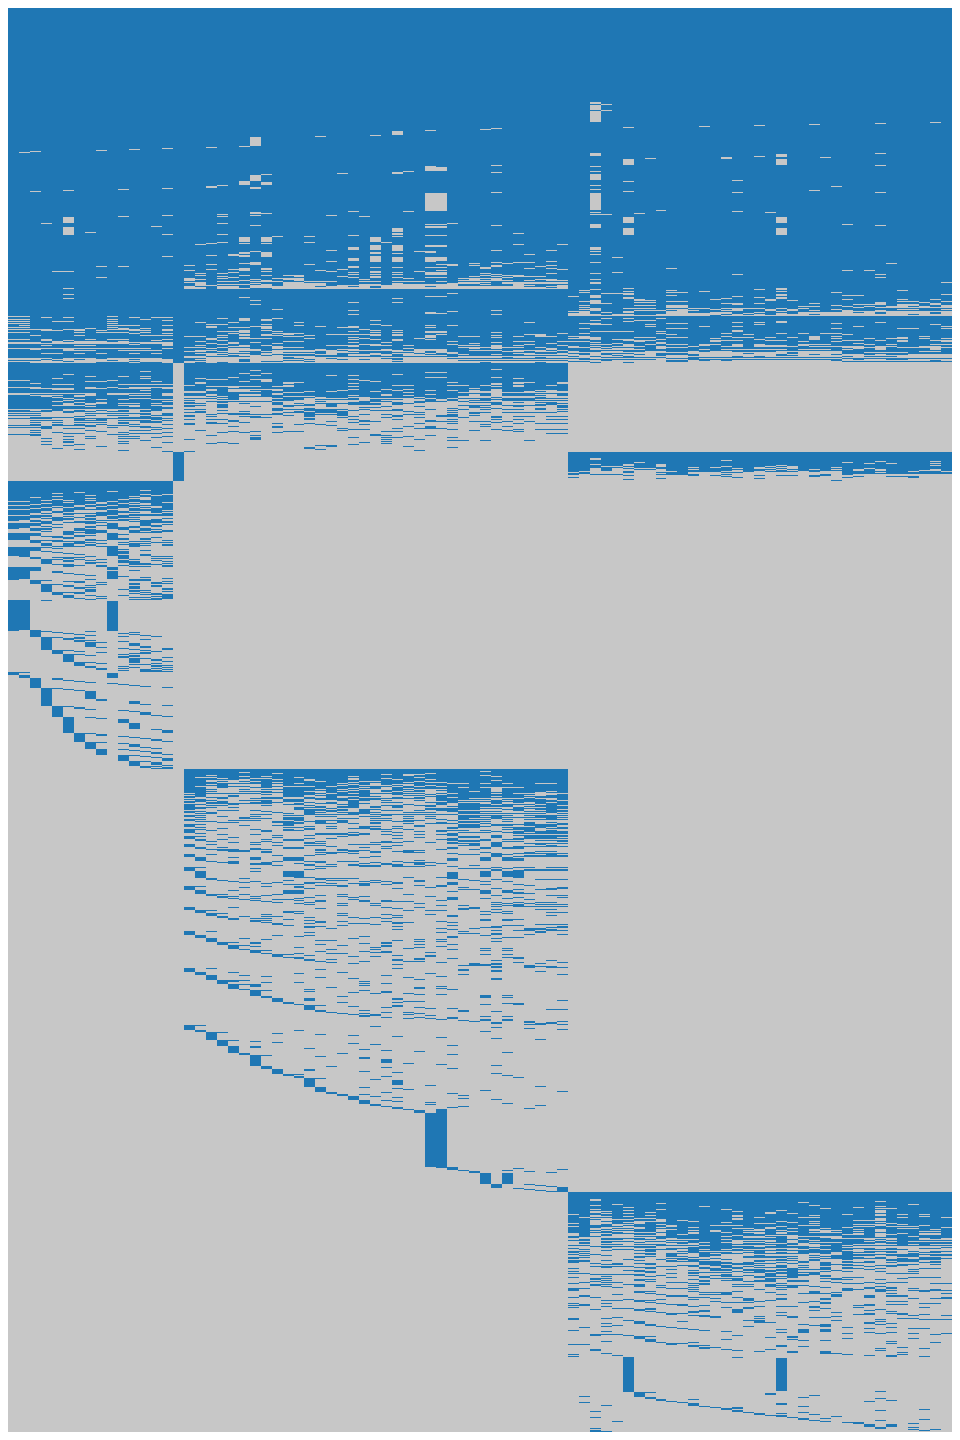

In [295]:
options(
    repr.plot.width = 8,
    repr.plot.height = 12
)

bk <- c(seq(-0.5, 3.5, by = 1))
p <- pheatmap(
    plotData,
    cluster_rows = F,
    cluster_cols = F,
    show_rownames = F,
    show_colnames = F,
    border_color = F, # 边框颜色
    breaks = bk,
    legend = F,
    color = colorRampPalette(
        c(
            "#C7C7C7", "#1F77B4", "#FF7F0E",
            "#E377C2"
        )
    )(4),
    # gaps_row = c(
    #     6830,16527,20477,22478
    # )
)

In [297]:
png(
    "syntelog_in_samples.png",
    height = 1200, width = 800, res = 800
)
print(p)
dev.off()

png 
  2

### 比较泛基因组分析时，三种类型的syntelogs在各自pan中的保守情况

+ 在每个pan中，至少1份材料中存在syntelog基因， A2-At-D5-Dt
+ 只在A基因组或者只在D基因组材料中存在的syntelog基因， A2-At, D5-Dt
+ 只在A2、At或者Dt材料中存在syntelog的基因

> 物种特异性的基因，在各自Pan的水平变异更大

In [6]:
library(ggplot2)
library(tidyr)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
syntelogClass_ratio <- read.table(
    "./syntelogClass_feature/syntelogClass_in_panRatio.txt",
    header = F,
)

In [3]:
head(syntelogClass_ratio)

,V1,V2,V3
,<fct>,<fct>,<dbl>
1,single,A2,0.20000000
2,single,Dt,0.25714286
3,single,Dt,0.17142857
4,single,Dt,0.08571429
5,single,Dt,0.20000000
6,single,Dt,0.14285714


In [4]:
syntelogClass_ratio$PresenceRatio=as.numeric(as.character(cut(
    syntelogClass_ratio$V3,
    breaks=c(
        -0.1,seq(0.1,1,0.1)
    ),
    labels=c(
        seq(0,0.9,0.1)
    )
)))

png 
  2

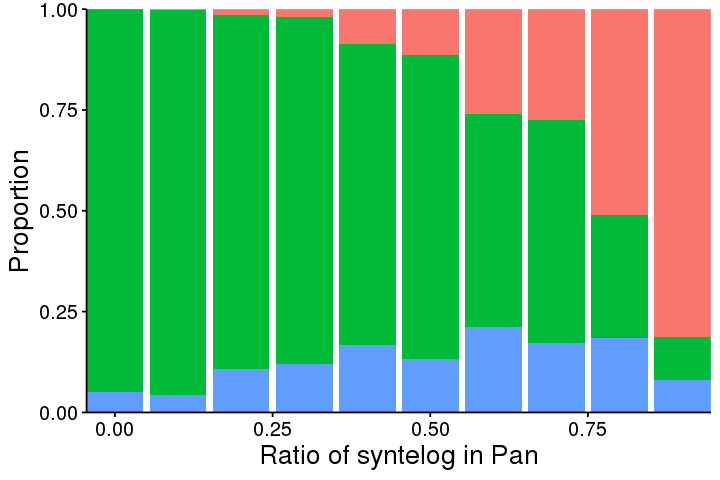

In [10]:
options(
    repr.plot.width = 6,
    repr.plot.height = 4
)
#* 每种Presence ratio下的基因总数
PresenceRatio_geneCount <- syntelogClass_ratio %>% count(PresenceRatio)
#* 每种presence Ratio下三种类型的基因总数
p=syntelogClass_ratio %>%
    group_by(PresenceRatio) %>%
    count(V1) %>%
    left_join(
        PresenceRatio_geneCount,
        by = "PresenceRatio"
    ) %>%
    ggplot(
        aes(x = PresenceRatio, y = n.x / n.y, fill = V1)
    ) +
    geom_bar(
        stat = "identity"
    ) +
    base_theme +
    theme(
        legend.position = "none",
        panel.background = element_blank(),
        panel.grid = element_blank()
    ) +
    scale_x_continuous(
        expand = c(0, 0)
    ) +
    scale_y_continuous(
        expand = c(0, 0)
    )+ylab("Proportion")+xlab(
        
        "Ratio of syntelog in Pan"
    )
pdf( 
    "syntelogClass_feature/syntelogClass_panRatio.pdf",
    width = 6,height = 4
)
print(p)
dev.off()
p

png 
  2

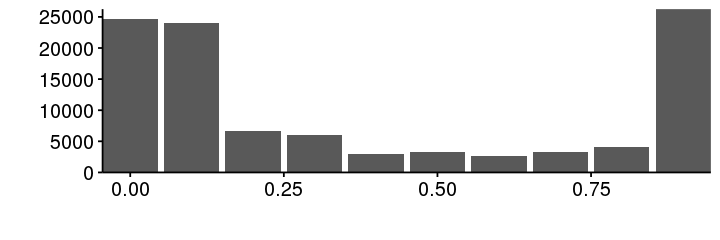

In [18]:
#* 每种分类下syntelog数目
options(
    repr.plot.width = 6,
    repr.plot.height = 2
)
p=PresenceRatio_geneCount %>% ggplot(
    aes(
        x=PresenceRatio,y=n
    )
    )+geom_bar(stat='identity')+base_theme +
    theme(
        legend.position = "none",
        panel.background = element_blank(),
        panel.grid = element_blank()
    ) +
    scale_x_continuous(
        expand = c(0, 0)
    ) +
    scale_y_continuous(
        expand = c(0, 0)
    )+ylab("")+xlab(
        ""
    )

pdf( 
    "syntelogClass_feature/syntelogClass_distribution.pdf",
    width = 6,height = 2
)
print(p)
dev.off()
p

In [338]:
PresenceRatio_geneCount

PresenceRatio,n
<dbl>,<int>
0.0,24722
0.1,24014
0.2,6714
0.3,6009
0.4,2923
0.5,3350
0.6,2616
0.7,3224
0.8,4136


### TODO 三种不同的Syntelog所对应的Orthologs的大小

In [19]:
library(ggplot2)
library(dplyr)
library(tidyr)

In [20]:
syntelogClass_count=read.table(
    "./syntelogClass_feature/syntelogClass_OrthologGroup_size.txt",
    header = F,sep="\t"
)

In [21]:
syntelogClass_count$syntelogCount <- as.numeric(as.character(cut(
    syntelogClass_count$V3,
    breaks = c(
        -0.1, seq(1, 10, 1),Inf
    ),
    labels = c(
        seq(0, 9, 1),10
    )
)))

In [22]:
head(syntelogClass_count)

,V1,V2,V3,syntelogCount
,<fct>,<fct>,<dbl>,<dbl>
1,single,A2,40,10
2,single,Dt,27,10
3,single,Dt,31,10
4,single,Dt,24,10
5,single,Dt,33,10
6,single,Dt,33,10


png 
  2

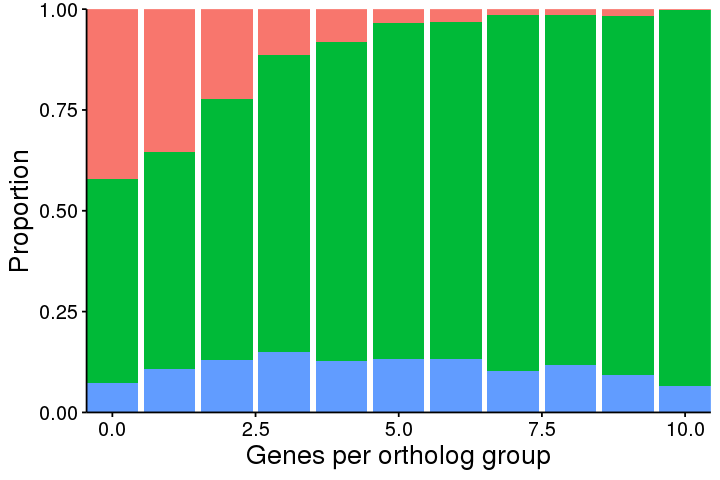

In [25]:
options(
    repr.plot.width = 6,
    repr.plot.height = 4
)
#* 每种syntelog Count下的基因总数
syntelogCount <- syntelogClass_count %>% count(syntelogCount)
#* 每种presence Ratio下三种类型的基因总数
p=syntelogClass_count %>%
    group_by(syntelogCount) %>%
    count(V1) %>%
    left_join(
        syntelogCount,
        by = "syntelogCount"
    ) %>% ggplot(
        aes(x = syntelogCount, y = n.x / n.y, fill = V1)
    ) +
    geom_bar(
        stat = "identity"
    ) +
    base_theme +
    theme(
        legend.position = "none",
        panel.background = element_blank(),
        panel.grid = element_blank()
    ) +
    scale_x_continuous(
        expand = c(0, 0)
    ) +
    scale_y_continuous(
        expand = c(0, 0)
    )+ylab("Proportion")+xlab(
        
        "Genes per ortholog group"
    )
pdf( 
    "syntelogClass_feature/syntelogClass_OrthologCount.pdf",
    width = 6,height = 4
)
print(p)
dev.off()
p    

In [26]:
head(syntelogCount)

,syntelogCount,n
,<dbl>,<int>
1,0,48357
2,1,10679
3,2,4749
4,3,3025
5,4,2143
6,5,1740


png 
  2

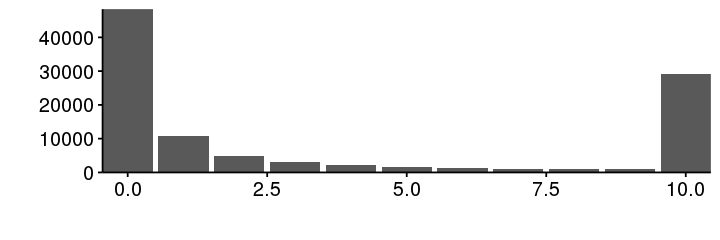

In [28]:
#* 每种分类下syntelog所对应Ortholog group大小分布
options(
    repr.plot.width = 6,
    repr.plot.height = 2
)
p=syntelogCount %>% ggplot(
    aes(
        x=syntelogCount,y=n
    )
    )+geom_bar(stat='identity')+base_theme +
    theme(
        legend.position = "none",
        panel.background = element_blank(),
        panel.grid = element_blank()
    ) +
    scale_x_continuous(
        expand = c(0, 0)
    ) +
    scale_y_continuous(
        expand = c(0, 0)
    )+ylab("")+xlab(
        ""
    )

pdf( 
    "syntelogClass_feature/syntelogClass_OrthologGroup_size_distribution.pdf",
    width = 6,height = 2
)
print(p)
dev.off()
p

### TODO 三种Panel所对应基因的长度信息

In [29]:
library(ggplot2)
library(dplyr)
library(tidyr)

In [30]:
syntelogClass_geneLength=read.table(
    "./syntelogClass_feature/syntelogClass_geneLength.txt",
    header = F,sep="\t"
)

In [31]:
head(syntelogClass_geneLength)

,V1,V2,V3
,<fct>,<fct>,<dbl>
1,single,A2,9307
2,single,Dt,578
3,single,Dt,356
4,single,Dt,566
5,single,Dt,575
6,single,Dt,368


In [32]:
#* 
syntelogClass_geneLength$syntelogGeneLen=as.numeric(as.character(cut(
    syntelogClass_geneLength$V3,
    breaks = c(
        -0.1, seq(0,5000,100),Inf
    ),
    labels = c(
        seq(0, 50, 1),51
    )
)))

In [66]:
head(syntelogClass_geneLength)

,V1,V2,V3,syntelogGeneLen
,<fct>,<fct>,<dbl>,<dbl>
1,single,A2,9307,51
2,single,Dt,578,6
3,single,Dt,356,4
4,single,Dt,566,6
5,single,Dt,575,6
6,single,Dt,368,4


png 
  2

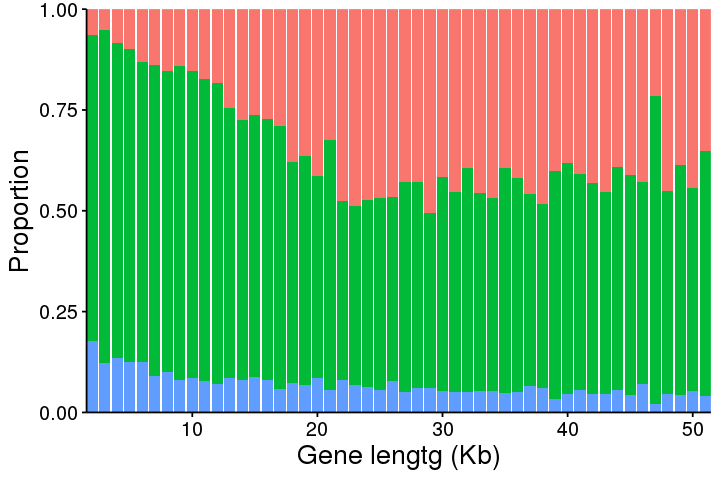

In [33]:
options(
    repr.plot.width = 6,
    repr.plot.height = 4
)
#* 每种syntelog Count下的基因总数
syntelogGeneLen <- syntelogClass_geneLength %>% count(syntelogGeneLen)
#* 每种presence Ratio下三种类型的基因总数
p=syntelogClass_geneLength %>%
    group_by(syntelogGeneLen) %>%
    count(V1) %>%
    left_join(
        syntelogGeneLen,
        by = "syntelogGeneLen"
    ) %>% ggplot(
        aes(x = syntelogGeneLen, y = n.x / n.y, fill = V1)
    ) +
    geom_bar(
        stat = "identity"
    ) +
    base_theme +
    theme(
        legend.position = "none",
        panel.background = element_blank(),
        panel.grid = element_blank()
    ) +
    scale_x_continuous(
        expand = c(0, 0)
    ) +
    scale_y_continuous(
        expand = c(0, 0)
    )+ylab("Proportion")+xlab(
        
        "Gene lengtg (Kb)"
    )
pdf( 
    "syntelogClass_feature/syntelogClass_geneLength.pdf",
    width = 6,height = 4
)
print(p)
dev.off()
p       

In [34]:
head(syntelogGeneLen)

,syntelogGeneLen,n
,<dbl>,<int>
1,2,595
2,3,5473
3,4,8020
4,5,7742
5,6,5140
6,7,4727


png 
  2

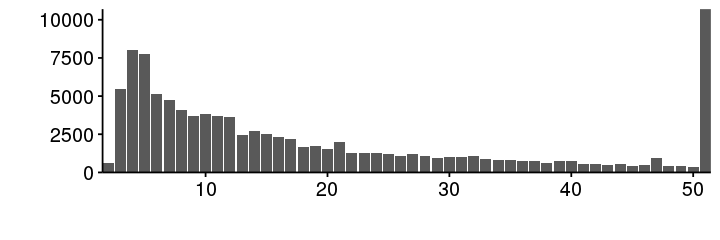

In [35]:
#* 每种分类下syntelog所对应基因长度大小分布
options(
    repr.plot.width = 6,
    repr.plot.height = 2
)
p=syntelogGeneLen %>% ggplot(
    aes(
        x=syntelogGeneLen,y=n
    )
    )+geom_bar(stat='identity')+base_theme +
    theme(
        legend.position = "none",
        panel.background = element_blank(),
        panel.grid = element_blank()
    ) +
    scale_x_continuous(
        expand = c(0, 0)
    ) +
    scale_y_continuous(
        expand = c(0, 0)
    )+ylab("")+xlab(
        ""
    )

pdf( 
    "syntelogClass_feature/syntelogClass_gene_length_distribution.pdf",
    width = 6,height = 2
)
print(p)
dev.off()
p

### TODO 当把At和Dt合并在一起看时，有多少syntelog在多倍化前后的变异

At基因在材料之间存在变异，Dt基因在材料之间存在变异；但是整个多倍体中至少一个基因是保守的

In [1]:
library(ggalluvial)
library(dplyr)
library(tidyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [1]:
sum(c(3384,1504,1405,639,566,497,336,316,218,154,114,42,41,25))

[1] 9241

In [2]:
plotData=data.frame(
    At=c('var','Core','var','var','var','Core','var','Core','var','var','Core','var','Core','Core'),
    Dt=c('Core','var','var','var','Core','var','Core','Core','var','Core','var','var','var','Core'),
    Tetraploid=c('Core','Core','var','var','var','var','Core','Core','Core','var','Core','Core','var','var'),
    Diploid=c('Core','Core','Core','var','Core','Core','var','var','Core','var','var','var','var','var'),
    syntelogCount=c(
        3384,1504,1405,639,566,497,336,316,218,154,114,42,41,25
    )
)
plotData

At,Dt,Tetraploid,Diploid,syntelogCount
<fct>,<fct>,<fct>,<fct>,<dbl>
var,Core,Core,Core,3384
Core,var,Core,Core,1504
var,var,var,Core,1405
var,var,var,var,639
var,Core,var,Core,566
Core,var,var,Core,497
var,Core,Core,var,336
Core,Core,Core,var,316
var,var,Core,Core,218


In [12]:
plotData %>% group_by(Dt) %>% mutate(a=sum(syntelogCount))

At,Dt,Tetraploid,Diploid,syntelogCount,a
<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>
var,Core,Core,Core,3384,4781
Core,var,Core,Core,1504,4460
var,var,var,Core,1405,4460
var,var,var,var,639,4460
var,Core,var,Core,566,4781
Core,var,var,Core,497,4460
var,Core,Core,var,336,4781
Core,Core,Core,var,316,4781
var,var,Core,Core,218,4460


Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
“Some strata appear at multiple axes.”
Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
“Some strata appear at multiple axes.”


png 
  2

Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
“Some strata appear at multiple axes.”
Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
“Some strata appear at multiple axes.”


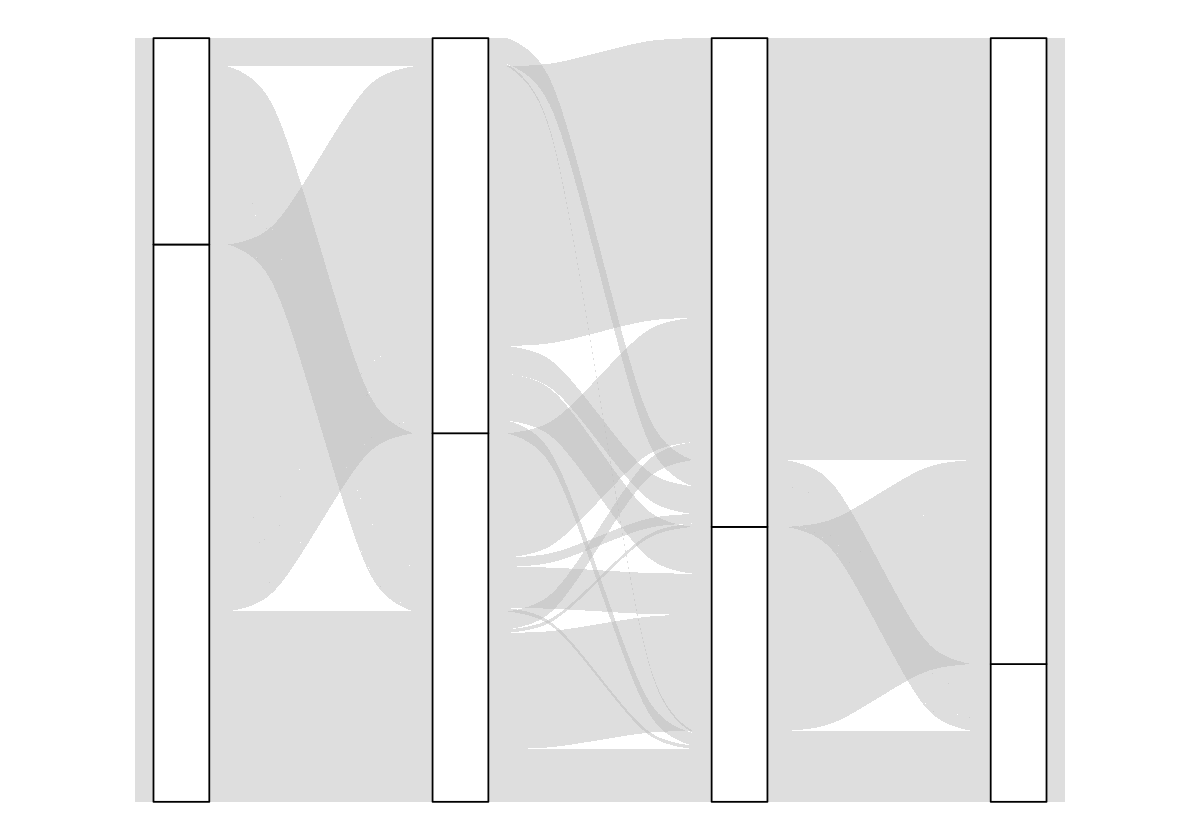

In [15]:
options(
  repr.plot.width = 10,
  repr.plot.heigh = 4
)
p=plotData %>% ggplot(aes(axis1 = At, axis2 = Dt, axis3 = Tetraploid, axis4 = Diploid, y = syntelogCount)) +
  scale_x_discrete(
    limits = c("At", "Dt", "Tetraploid", "Diploid"),
    expand = c(.2, .05)
  ) +
  xlab("Demographic") +
  geom_alluvium() +
  geom_stratum(
    width = 0.2
  ) +
  theme_void()
pdf("syntelogGene_var_betweenGenomes.pdf",width = 10,height = 4)
print(p)
dev.off()
p

### TODO 不同材料基因在启动子区域有无SVs变异对基因表达的影响

+ 基因在启动子区域没有差异的，其表达存在差异的基因占比
+ 基因在启动子区域发生INS，其表达存在差异的基因占比
+ 基因在启动子区域发生DEL，其表达存在差异的基因占比

> 更高比例的基因是存在Upregulation, 这可能是跟定义差异表达的方法有关

In [18]:
library(dplyr)
library(tidyr)
library(ggplot2)

In [61]:
A2_plotData=data.frame(
    Vartype=c('DEL', 'INS', 'NOVariant', 'DEL', 'INS', 'NOVariant', 'DEL',
        'INS', 'NOVariant', 'DEL', 'INS', 'NOVariant'),
    TotalGene=c(2659, 2980, 11357, 2659, 2980, 11357, 2659, 2980, 11357, 2659,
        2980, 11357),
    upRegulate=c(230, 207, 666, 82, 88, 312, 230, 222, 739, 180, 187, 571),
    downRegulate=c(72, 96, 266, 584, 723, 2534, 163, 187, 516, 180, 199, 640),
    noDifference=c(2357, 2677, 10425, 1993, 2169, 8511, 2266, 2571, 10102, 2299,
        2594, 10146),
    stage=c('4DPA', '4DPA', '4DPA', '12DPA', '12DPA', '12DPA', '16DPA',
        '16DPA', '16DPA', '20DPA', '20DPA', '20DPA')
)

In [62]:
A2_plotData %>% filter(stage=="4DPA") %>% head

,Vartype,TotalGene,upRegulate,downRegulate,noDifference,stage
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,DEL,2659,230,72,2357,4DPA
2,INS,2980,207,96,2677,4DPA
3,NOVariant,11357,666,266,10425,4DPA


In [88]:
plotData <- A2_plotData %>%
    filter(stage == "4DPA") %>%
    mutate(
        upRegulateRatio = upRegulate / TotalGene,
        downRegulateRatio = downRegulate / TotalGene,
        noDifferenceRatio = noDifference / TotalGene,
    ) %>%
    pivot_longer(
        cols = c(upRegulateRatio, downRegulateRatio, noDifferenceRatio),
        names_to = "geneClass",
        values_to = "ratio"
    )
plotData$geneClass <- factor(
    plotData$geneClass,
    levels = c("upRegulateRatio", "downRegulateRatio", "noDifferenceRatio")
)
plotData

Vartype,TotalGene,upRegulate,downRegulate,noDifference,stage,geneClass,ratio
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>
DEL,2659,230,72,2357,4DPA,upRegulateRatio,0.08649868
DEL,2659,230,72,2357,4DPA,downRegulateRatio,0.02707785
DEL,2659,230,72,2357,4DPA,noDifferenceRatio,0.88642347
INS,2980,207,96,2677,4DPA,upRegulateRatio,0.06946309
INS,2980,207,96,2677,4DPA,downRegulateRatio,0.03221477
INS,2980,207,96,2677,4DPA,noDifferenceRatio,0.89832215
NOVariant,11357,666,266,10425,4DPA,upRegulateRatio,0.05864225
NOVariant,11357,666,266,10425,4DPA,downRegulateRatio,0.02342168
NOVariant,11357,666,266,10425,4DPA,noDifferenceRatio,0.91793607


#### A2的数据

png 
  2

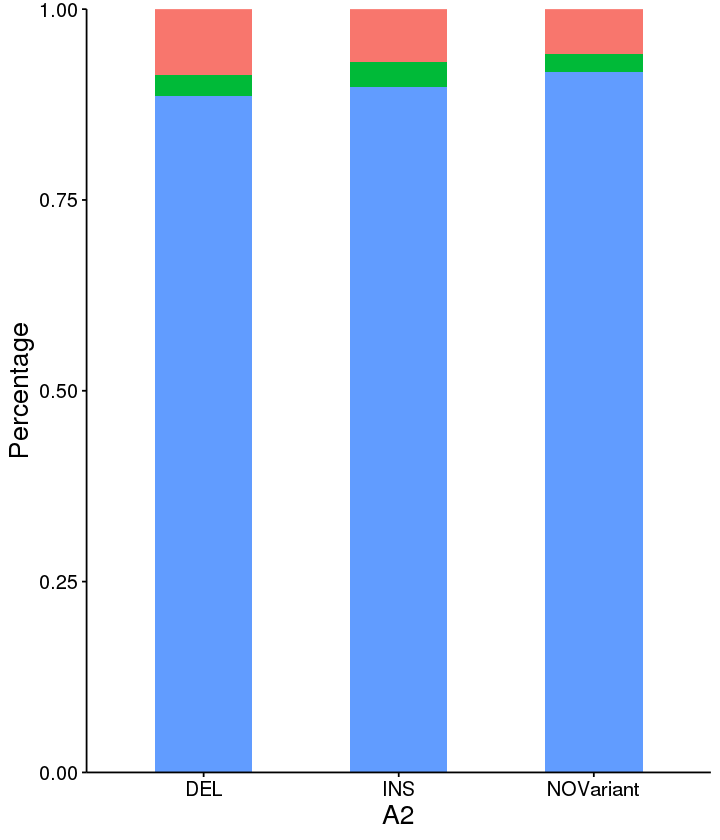

In [68]:
options(
    repr.plot.width = 6,
    repr.plot.heigh = 3
)
p=plotData %>% ggplot(
    aes(x = Vartype, y = ratio, fill = geneClass)
    ) +
    geom_bar(
        stat = "identity", width = 0.5
    ) +
    base_theme +
    theme(
        legend.position = "none",
        panel.background = element_blank(),
        panel.grid = element_blank()
    ) +
    scale_y_continuous(
        expand = c(0, 0)
    ) +
    xlab("A2") +
    ylab("Percentage")

pdf("./syntelogClass_feature/A2_promoter_expression.pdf",width = 6,height = 3)
print(p)
dev.off()
p

#### At的数据

In [76]:
#* At的expression data
At_plotData=read.table(
    "./syntelogClass_feature/Atgene_promoter_SV_expressionState.txt",
    header=T,sep="\t"
)

In [71]:
plotData=At_plotData %>%
    filter(stage == "4DPA") %>%
    mutate(
        upRegulateRatio = upRegulate / genePairsCount,
        downRegulateRatio = downRegulate / genePairsCount,
        noDifferenceRatio = noDifference / genePairsCount,
    ) %>%
    pivot_longer(
        cols = c(upRegulateRatio, downRegulateRatio, noDifferenceRatio),
        names_to = "geneClass",
        values_to = "ratio"
    )
plotData$geneClass <- factor(
    plotData$geneClass,
    levels = c("upRegulateRatio", "downRegulateRatio", "noDifferenceRatio")
)
head(plotData)

VarType,genePairsCount,upRegulate,downRegulate,noDifference,stage,geneClass,ratio
<fct>,<int>,<int>,<int>,<int>,<fct>,<fct>,<dbl>
DEL,10299,1654,804,7841,4DPA,upRegulateRatio,0.16059812
DEL,10299,1654,804,7841,4DPA,downRegulateRatio,0.07806583
DEL,10299,1654,804,7841,4DPA,noDifferenceRatio,0.76133605
INS,10449,1520,1021,7908,4DPA,upRegulateRatio,0.14546847
INS,10449,1520,1021,7908,4DPA,downRegulateRatio,0.09771270
INS,10449,1520,1021,7908,4DPA,noDifferenceRatio,0.75681883


png 
  2

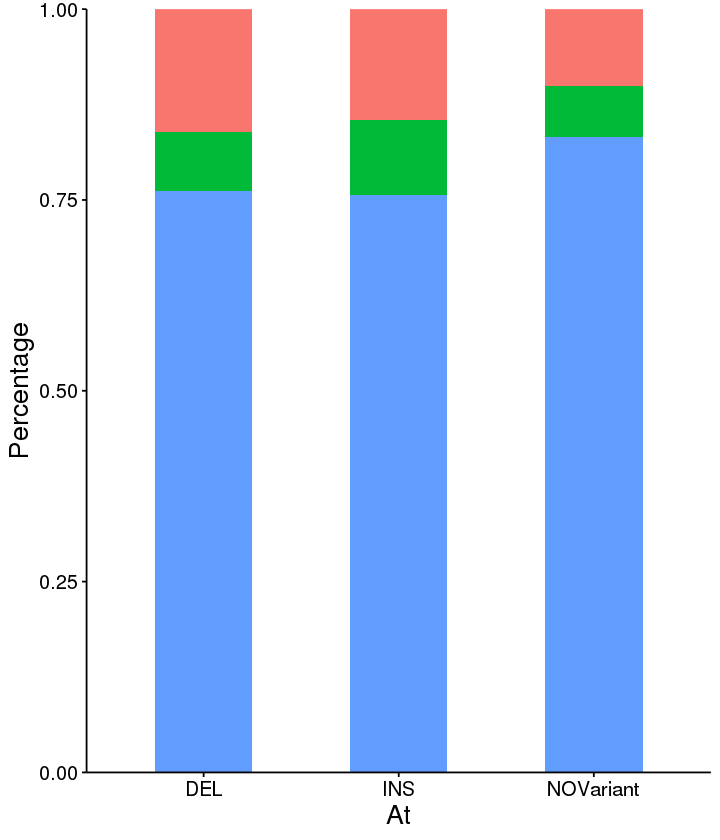

In [75]:
options(
    repr.plot.width = 6,
    repr.plot.heigh = 3
)
p=plotData %>% ggplot(
    aes(x = VarType, y = ratio, fill = geneClass)
) +
    geom_bar(
        stat = "identity", width = 0.5
    ) +
    base_theme +
    theme(
        legend.position = "none",
        panel.background = element_blank(),
        panel.grid = element_blank()
    ) +
    scale_y_continuous(
        expand = c(0, 0)
    ) +
    xlab("At")+ylab("Percentage")
pdf("./syntelogClass_feature/At_promoter_expression.pdf",width = 6,height = 3)
print(p)
dev.off()
p

#### Dt数据

In [77]:
#* Dt的expression data
Dt_plotData=read.table(
    "./syntelogClass_feature/Dtgene_promoter_SV_expressionState.txt",
    header=T,sep="\t"
)

In [81]:
plotData=Dt_plotData %>%
    filter(stage == "4DPA") %>%
    mutate(
        upRegulateRatio = upRegulate / genePairsCount,
        downRegulateRatio = downRegulate / genePairsCount,
        noDifferenceRatio = noDifference / genePairsCount,
    ) %>%
    pivot_longer(
        cols = c(upRegulateRatio, downRegulateRatio, noDifferenceRatio),
        names_to = "geneClass",
        values_to = "ratio"
    )
plotData$geneClass <- factor(
    plotData$geneClass,
    levels = c("upRegulateRatio", "downRegulateRatio", "noDifferenceRatio")
)
head(plotData)

VarType,genePairsCount,upRegulate,downRegulate,noDifference,stage,geneClass,ratio
<fct>,<int>,<int>,<int>,<int>,<fct>,<fct>,<dbl>
DEL,9690,1262,822,7606,4DPA,upRegulateRatio,0.13023736
DEL,9690,1262,822,7606,4DPA,downRegulateRatio,0.08482972
DEL,9690,1262,822,7606,4DPA,noDifferenceRatio,0.78493292
INS,10571,1361,1084,8126,4DPA,upRegulateRatio,0.12874846
INS,10571,1361,1084,8126,4DPA,downRegulateRatio,0.10254470
INS,10571,1361,1084,8126,4DPA,noDifferenceRatio,0.76870684


png 
  2

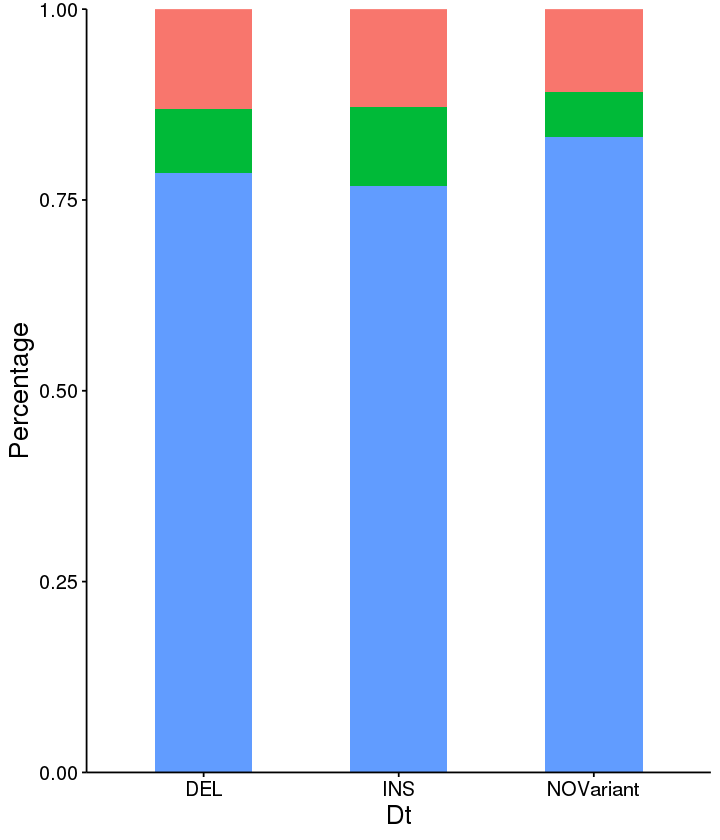

In [82]:
options(
    repr.plot.width = 6,
    repr.plot.heigh = 3
)
p=plotData %>% ggplot(
    aes(x = VarType, y = ratio, fill = geneClass)
) +
    geom_bar(
        stat = "identity", width = 0.5
    ) +
    base_theme +
    theme(
        legend.position = "none",
        panel.background = element_blank(),
        panel.grid = element_blank()
    ) +
    scale_y_continuous(
        expand = c(0, 0)
    ) +
    xlab("Dt")+ylab("Percentage")
pdf("./syntelogClass_feature/Dt_promoter_expression.pdf",width = 6,height = 3)
print(p)
dev.off()
p